In [81]:
#JAI MATA DI

In [82]:
!pip install moviepy

Defaulting to user installation because normal site-packages is not writeable

# Importing The Packages

In [83]:
import os
import sys
import time
import json
import requests
import subprocess
import pandas as pd

In [84]:
import os
import pandas as pd

# Define the folder path
folder_path = 'Video_Speech_Actor_01'

# Define the mappings
modality_mapping = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
vocal_channel_mapping = {'01': 'speech', '02': 'song'}
emotion_mapping = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

# Initialize an empty list to store the data
data = []

# Iterate through the folders and files
for actor_folder in os.listdir(folder_path):
    actor_path = os.path.join(folder_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.mp4'):
                parts = file_name.split('-')
                modality = modality_mapping[parts[0]]
                vocal_channel = vocal_channel_mapping[parts[1]]
                emotion = emotion_mapping[parts[2]]
                intensity = 'normal' if parts[3] == '01' else 'strong'
                statement = 'Statement 01' if parts[4] == '01' else 'Statement 02'
                repetition = 'Repetition 01' if parts[5] == '01' else 'Repetition 02'
                actor = int(parts[6].split('.')[0])
                gender = 'male' if actor % 2 != 0 else 'female'
                
                # Append the data to the list
                data.append({
                    'File Name': file_name,
                    'Modality': modality,
                    'Vocal Channel': vocal_channel,
                    'Emotion': emotion,
                    'Intensity': intensity,
                    'Statement': statement,
                    'Repetition': repetition,
                    'Actor': actor,
                    'Gender': gender,
                    'File Path': os.path.join(actor_path, file_name)
                })

# Create a dataframe from the data
df = pd.DataFrame(data)
print(df)

                    File Name    Modality Vocal Channel    Emotion Intensity  \
0    01-01-01-01-01-01-01.mp4     full-AV        speech    neutral    normal   
1    01-01-01-01-01-02-01.mp4     full-AV        speech    neutral    normal   
2    01-01-01-01-02-01-01.mp4     full-AV        speech    neutral    normal   
3    01-01-01-01-02-02-01.mp4     full-AV        speech    neutral    normal   
4    01-01-02-01-01-01-01.mp4     full-AV        speech       calm    normal   
..                        ...         ...           ...        ...       ...   
715  02-01-08-01-02-02-06.mp4  video-only        speech  surprised    normal   
716  02-01-08-02-01-01-06.mp4  video-only        speech  surprised    strong   
717  02-01-08-02-01-02-06.mp4  video-only        speech  surprised    strong   
718  02-01-08-02-02-01-06.mp4  video-only        speech  surprised    strong   
719  02-01-08-02-02-02-06.mp4  video-only        speech  surprised    strong   

        Statement     Repetition  Actor

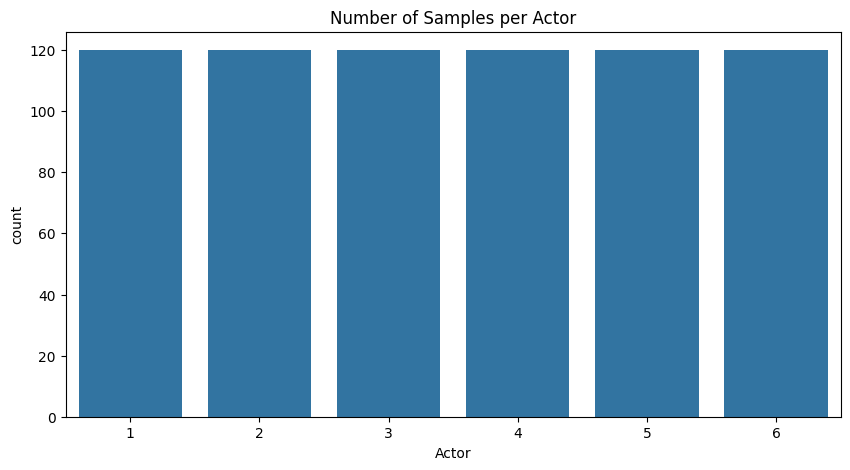

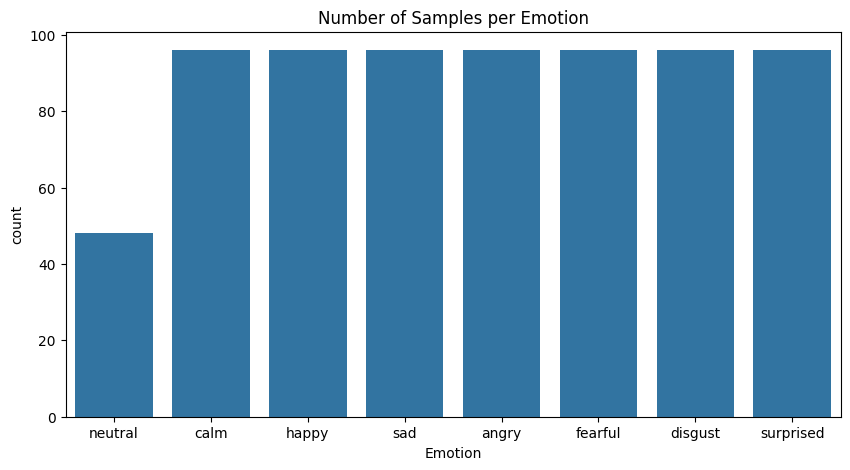

In [85]:
#visulaization of Datas based on Actor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='Actor', data=df)
plt.title('Number of Samples per Actor')
plt.show()

#visulaization of Datas based on Emotion
plt.figure(figsize=(10, 5))
sns.countplot(x='Emotion', data=df)
plt.title('Number of Samples per Emotion')
plt.show()


In [86]:
print(df.columns)

Index(['File Name', 'Modality', 'Vocal Channel', 'Emotion', 'Intensity',
       'Statement', 'Repetition', 'Actor', 'Gender', 'File Path'],
      dtype='object')


In [107]:


from moviepy import AudioFileClip
import numpy as np

# Function to load audio from .mp4
def load_audio_from_mp4(file_path):
    audio_clip = AudioFileClip(file_path)
    y = np.array(audio_clip.to_soundarray())
    sr = audio_clip.fps  # Sampling rate
    audio_clip.close()
    # Convert stereo to mono if needed
    if y.ndim > 1:
        y = y.mean(axis=1)
    return y, sr

Processing file: Video_Speech_Actor_01\Actor_02\01-01-05-02-02-01-02.mp4 | Emotion: angry | Gender: female


C:\Users\ADITYA UPADHYAY\AppData\Local\Temp\ipykernel_37196\1498321328.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = filtered_df.groupby(['Emotion', 'Gender']).apply(lambda x: x.sample(1)).reset_index(drop=True)


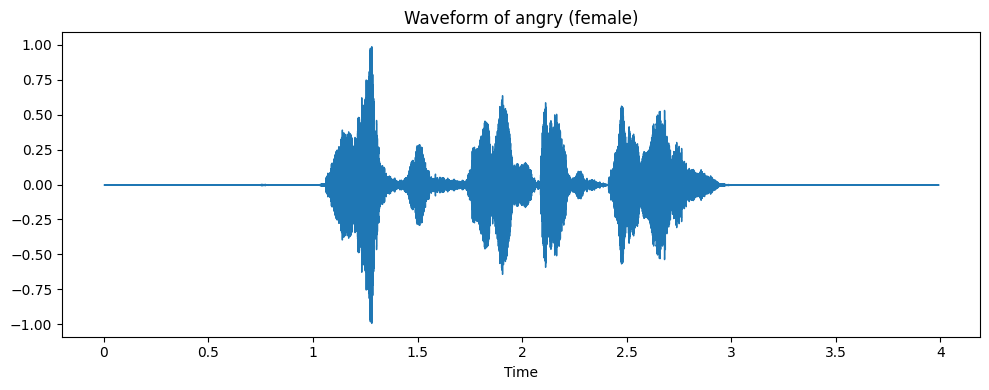

Processing file: Video_Speech_Actor_01\Actor_01\01-01-05-02-01-02-01.mp4 | Emotion: angry | Gender: male


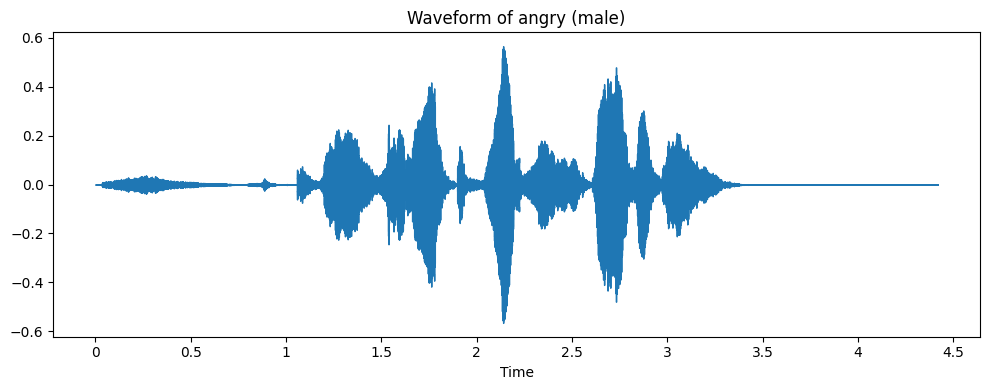

Processing file: Video_Speech_Actor_01\Actor_02\01-01-02-01-02-02-02.mp4 | Emotion: calm | Gender: female


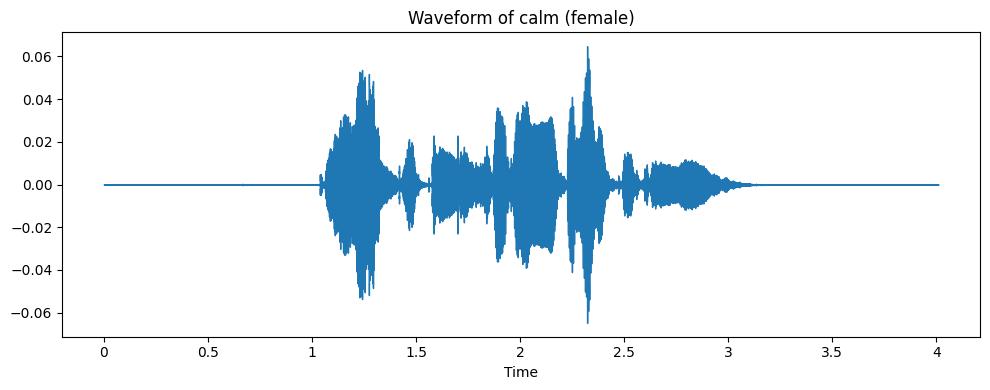

Processing file: Video_Speech_Actor_01\Actor_03\01-01-02-01-01-02-03.mp4 | Emotion: calm | Gender: male


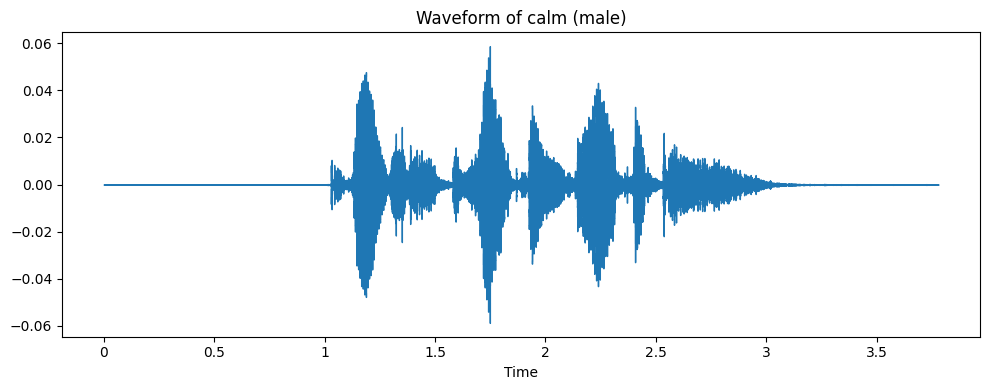

Processing file: Video_Speech_Actor_01\Actor_06\01-01-07-01-02-01-06.mp4 | Emotion: disgust | Gender: female


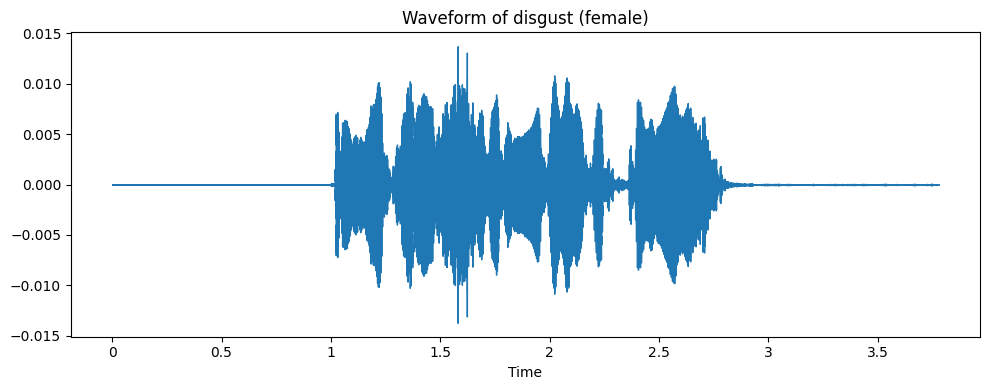

Processing file: Video_Speech_Actor_01\Actor_05\01-01-07-01-02-01-05.mp4 | Emotion: disgust | Gender: male


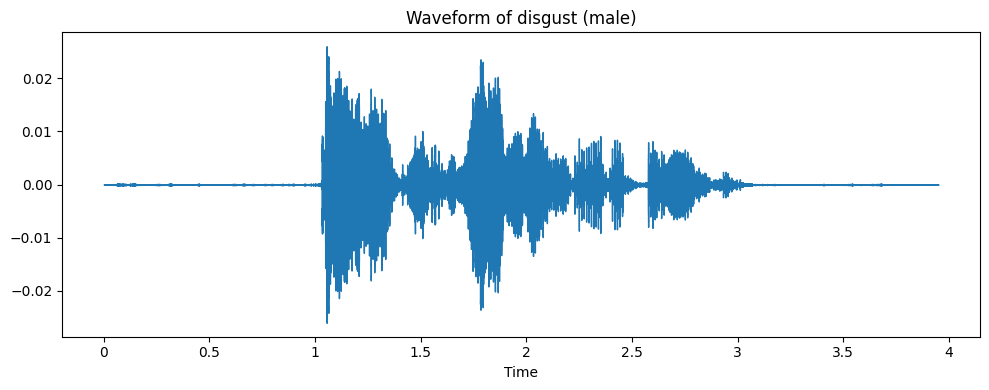

Processing file: Video_Speech_Actor_01\Actor_02\01-01-06-01-01-02-02.mp4 | Emotion: fearful | Gender: female


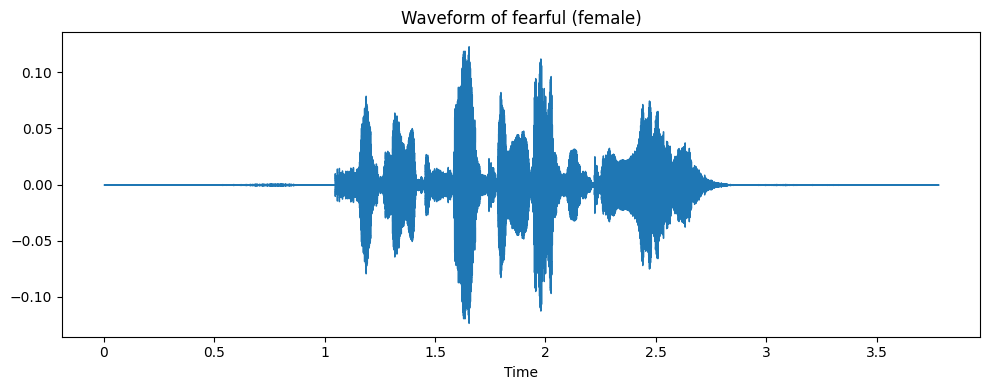

Processing file: Video_Speech_Actor_01\Actor_03\01-01-06-02-01-02-03.mp4 | Emotion: fearful | Gender: male


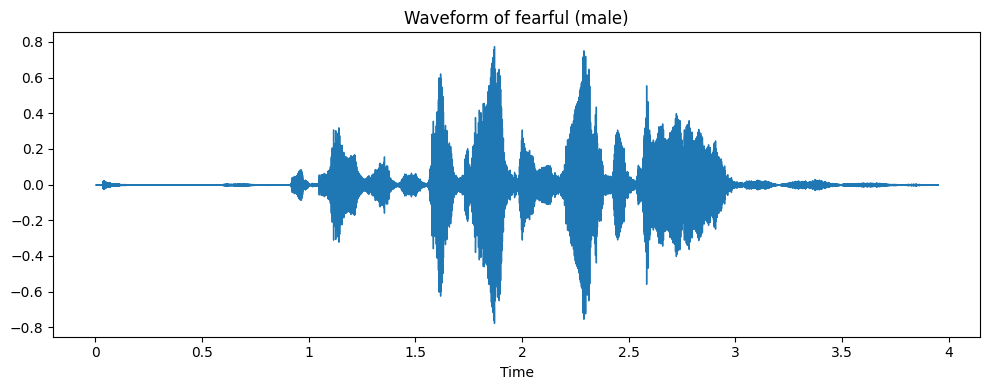

Processing file: Video_Speech_Actor_01\Actor_06\01-01-03-02-01-02-06.mp4 | Emotion: happy | Gender: female


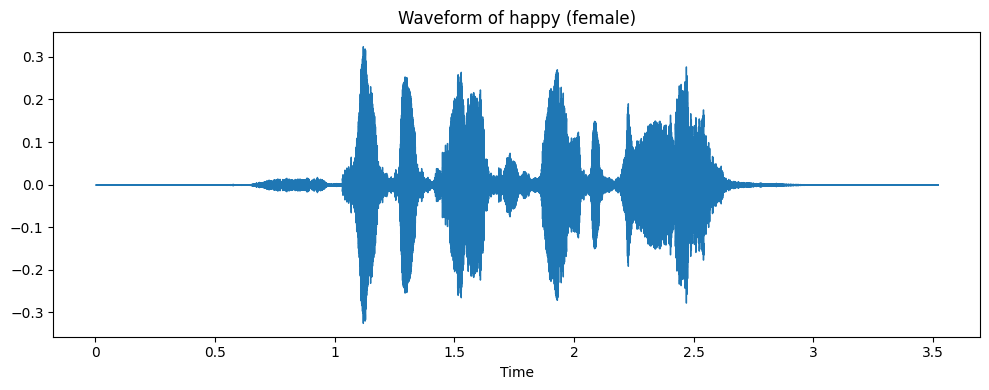

Processing file: Video_Speech_Actor_01\Actor_01\01-01-03-02-02-01-01.mp4 | Emotion: happy | Gender: male


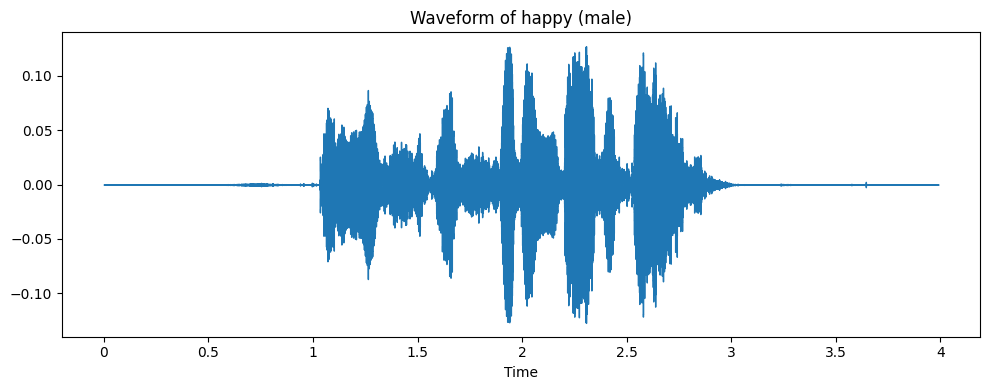

Processing file: Video_Speech_Actor_01\Actor_02\01-01-01-01-01-02-02.mp4 | Emotion: neutral | Gender: female


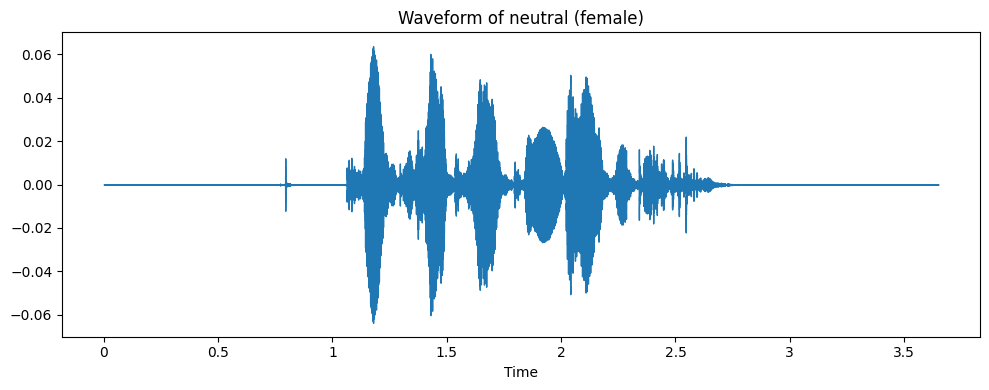

Processing file: Video_Speech_Actor_01\Actor_05\01-01-01-01-02-02-05.mp4 | Emotion: neutral | Gender: male


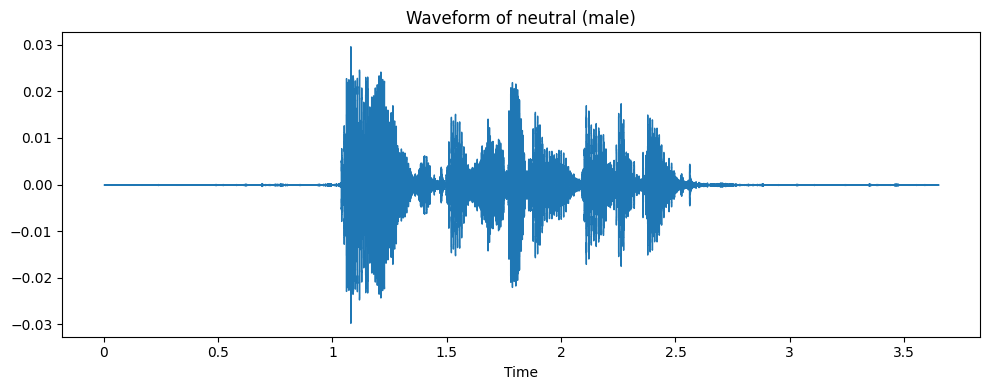

Processing file: Video_Speech_Actor_01\Actor_06\01-01-04-01-02-02-06.mp4 | Emotion: sad | Gender: female


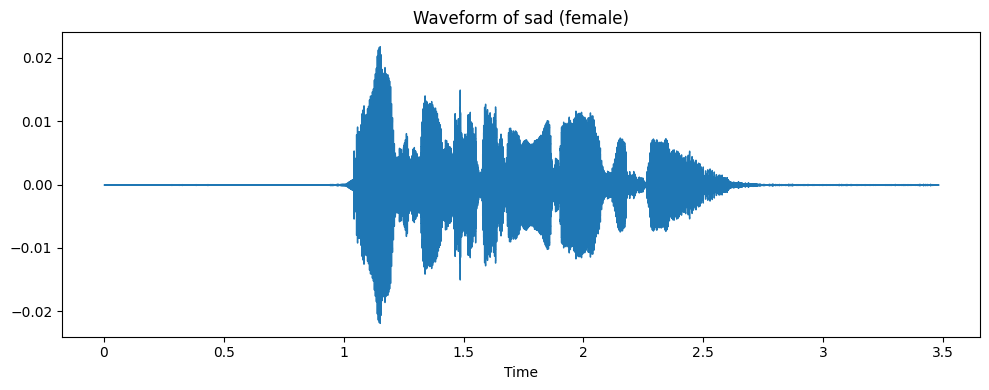

Processing file: Video_Speech_Actor_01\Actor_01\01-01-04-02-01-01-01.mp4 | Emotion: sad | Gender: male


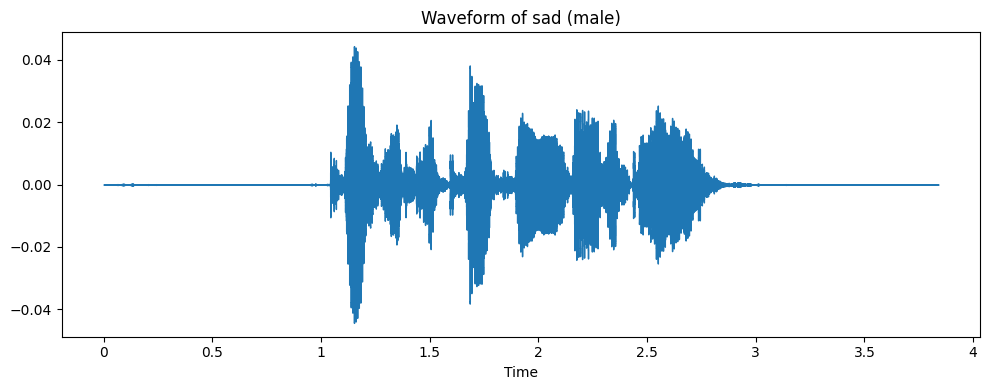

Processing file: Video_Speech_Actor_01\Actor_04\01-01-08-01-01-01-04.mp4 | Emotion: surprised | Gender: female


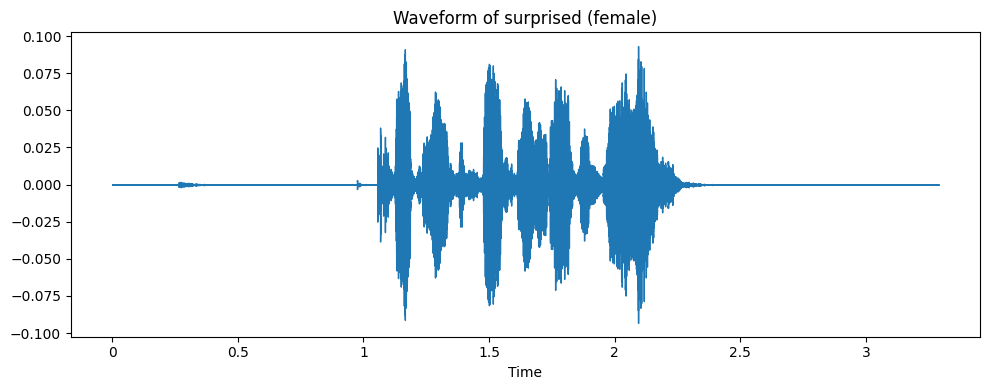

Processing file: Video_Speech_Actor_01\Actor_05\01-01-08-01-01-02-05.mp4 | Emotion: surprised | Gender: male


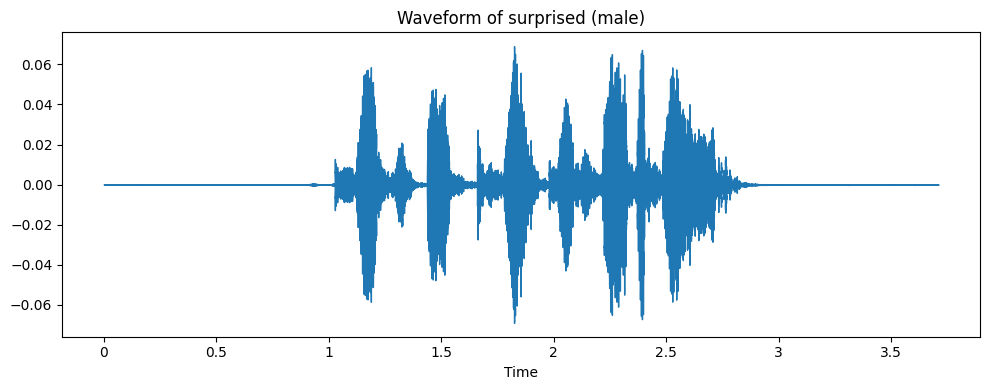

In [88]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Filter out video-only samples
filtered_df = df[df['Modality'] != 'video-only']

# Extract one random sample for each emotion and gender
samples = filtered_df.groupby(['Emotion', 'Gender']).apply(lambda x: x.sample(1)).reset_index(drop=True)
for i, row in samples.iterrows():
    file_path = row['File Path']
    emotion = row['Emotion']
    gender = row['Gender']
    print(f"Processing file: {file_path} | Emotion: {emotion} | Gender: {gender}")
    
    try:
        y, sr = load_audio_from_mp4(file_path)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        continue

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform of {emotion} ({gender})')
    plt.tight_layout()
    plt.show()


In [89]:
import librosa

def remove_silence(y, sr, top_db=20):
    """
    Remove silence from an audio signal.
    
    Parameters:
    y (numpy.ndarray): Audio time series.
    sr (int): Sampling rate of `y`.
    top_db (int): The threshold (in decibels) below reference to consider as silence.
    
    Returns:
    numpy.ndarray: Audio time series with silence removed.
    """
    # Split the audio signal into non-silent intervals
    non_silent_intervals = librosa.effects.split(y, top_db=top_db)
    
    # Concatenate the non-silent intervals
    non_silent_audio = np.concatenate([y[start:end] for start, end in non_silent_intervals])
    
    return non_silent_audio

def preprocess_audio_files(df):
    """
    Preprocess all audio files in the dataframe by removing silence.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing audio file paths.
    
    Returns:
    pandas.DataFrame: DataFrame with preprocessed audio files.
    """
    preprocessed_data = []
    
    for i, row in df.iterrows():
        file_path = row['File Path']
        try:
            y, sr = load_audio_from_mp4(file_path)
            y = remove_silence(y, sr)
            
            # Skip files that are completely silent
            if len(y) == 0:
                continue
            
            # Update the row with the preprocessed audio
            row['Audio'] = y
            row['Sampling Rate'] = sr
            preprocessed_data.append(row)
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
            continue
    
    return pd.DataFrame(preprocessed_data)

# Preprocess the audio files
preprocessed_df = preprocess_audio_files(filtered_df)
print(preprocessed_df)

                    File Name Modality Vocal Channel    Emotion Intensity  \
0    01-01-01-01-01-01-01.mp4  full-AV        speech    neutral    normal   
1    01-01-01-01-01-02-01.mp4  full-AV        speech    neutral    normal   
2    01-01-01-01-02-01-01.mp4  full-AV        speech    neutral    normal   
3    01-01-01-01-02-02-01.mp4  full-AV        speech    neutral    normal   
4    01-01-02-01-01-01-01.mp4  full-AV        speech       calm    normal   
..                        ...      ...           ...        ...       ...   
655  01-01-08-01-02-02-06.mp4  full-AV        speech  surprised    normal   
656  01-01-08-02-01-01-06.mp4  full-AV        speech  surprised    strong   
657  01-01-08-02-01-02-06.mp4  full-AV        speech  surprised    strong   
658  01-01-08-02-02-01-06.mp4  full-AV        speech  surprised    strong   
659  01-01-08-02-02-02-06.mp4  full-AV        speech  surprised    strong   

        Statement     Repetition  Actor  Gender  \
0    Statement 01  Repet

In [94]:
import librosa
import numpy as np

def extract_features(y, sr):
    """
    Extract audio features from an audio signal.
    
    Parameters:
    y (numpy.ndarray): Audio time series.
    sr (int): Sampling rate of `y`.
    
    Returns:
    dict: Dictionary containing extracted features.
    """
    features = {}
    
    # Extract features
    features['chroma_stft'] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    features['rmse'] = np.mean(librosa.feature.rms(y=y))
    features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features['spectral_bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features['rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features['zero_crossing_rate'] = np.mean(librosa.feature.zero_crossing_rate(y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    for i in range(1, 21):
        features[f'mfcc_{i}'] = np.mean(mfccs[i-1])
    
    return features

# Extract features for each audio file in the dataframe
feature_list = []
for i, row in preprocessed_df.iterrows():
    y = row['Audio']
    sr = row['Sampling Rate']
    features = extract_features(y, sr)
    features['File Name'] = row['File Name']
    features['Emotion'] = row['Emotion']
    feature_list.append(features)

# Create a dataframe from the extracted features
features_df = pd.DataFrame(feature_list)
print(features_df.head())

# Save the extracted features to a CSV file
features_df.to_csv('extracted_features.csv', index=False)

   chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.451659  0.005970        1991.372151         2724.858844  3461.572266   
1     0.436611  0.006204        2146.639975         2908.164770  3900.676413   
2     0.415953  0.007191        2280.890705         2757.364387  4023.427734   
3     0.451833  0.006846        2514.118370         3025.911803  4456.938033   
4     0.419773  0.004147        2252.937690         2894.290139  3865.112965   

   zero_crossing_rate      mfcc_1      mfcc_2    mfcc_3     mfcc_4  ...  \
0            0.039157 -527.117996  168.277812 -5.277614  23.913459  ...   
1            0.040609 -524.823798  158.740156 -4.440534  28.272176  ...   
2            0.050902 -511.398241  159.441729 -3.896355  30.142680  ...   
3            0.057445 -505.955499  148.637058 -1.486240  34.765550  ...   
4            0.051674 -573.127583  158.877238 -1.873156  34.047614  ...   

    mfcc_13    mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfc

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Define the feature columns (excluding the target column 'Emotion')
feature_columns = features_df.columns.difference(['Emotion', 'File Name'])
# Initialize the label encoder
le = LabelEncoder()

# Encode the target column 'Emotion'
features_df['Emotion'] = le.fit_transform(features_df['Emotion'])
# Create X and y
X = features_df[feature_columns]
y = features_df['Emotion']

# Split the dataset into training and testing sets with stratification on the 'Emotion' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train shape: (288, 26)
X_test shape: (72, 26)
y_train shape: (288,)
y_test shape: (72,)


In [96]:
print(y_train)

99     3
113    7
322    6
320    6
301    5
      ..
41     3
107    2
119    7
135    4
68     1
Name: Emotion, Length: 288, dtype: int32


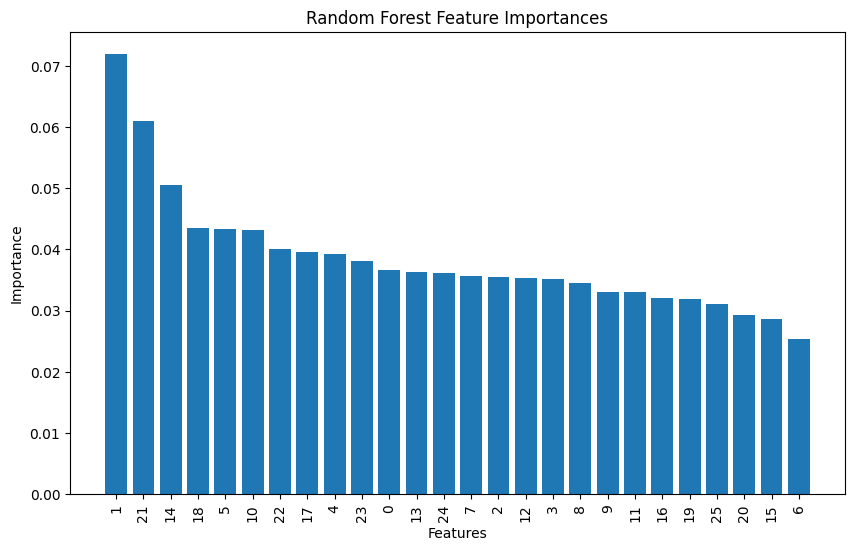

In [101]:
import pandas as pd

# Convert X_train to a DataFrame if it's not already one
X_train = pd.DataFrame(X_train)

# Plot feature importance with proper labels
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [108]:
print(y_test_categorical)

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 

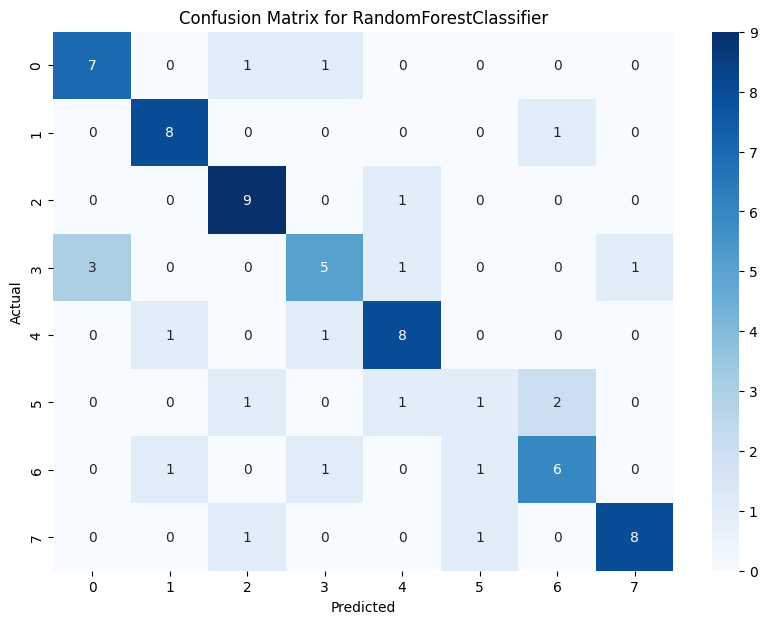

RandomForestClassifier ROC AUC: 0.9607256323774539
RandomForestClassifier F1 Score: 0.7116388931081913
RandomForestClassifier Accuracy: 0.7222222222222222
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.80      0.89      0.84         9
           2       0.75      0.90      0.82        10
           3       0.62      0.50      0.56        10
           4       0.73      0.80      0.76        10
           5       0.33      0.20      0.25         5
           6       0.67      0.67      0.67         9
           7       0.89      0.80      0.84        10

    accuracy                           0.72        72
   macro avg       0.69      0.69      0.68        72
weighted avg       0.71      0.72      0.71        72

Epoch 1/50


C:\Users\ADITYA UPADHYAY\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1160 - loss: 2.1127       
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2717 - loss: 1.9087 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 1.7076 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4516 - loss: 1.6422
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 1.4888
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5538 - loss: 1.3823 
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6449 - loss: 1.2299 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5725 - loss: 1.2238 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6603 - loss: 1.0542 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7182 - loss: 0.9999 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7932 - loss: 0.8604 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7749 

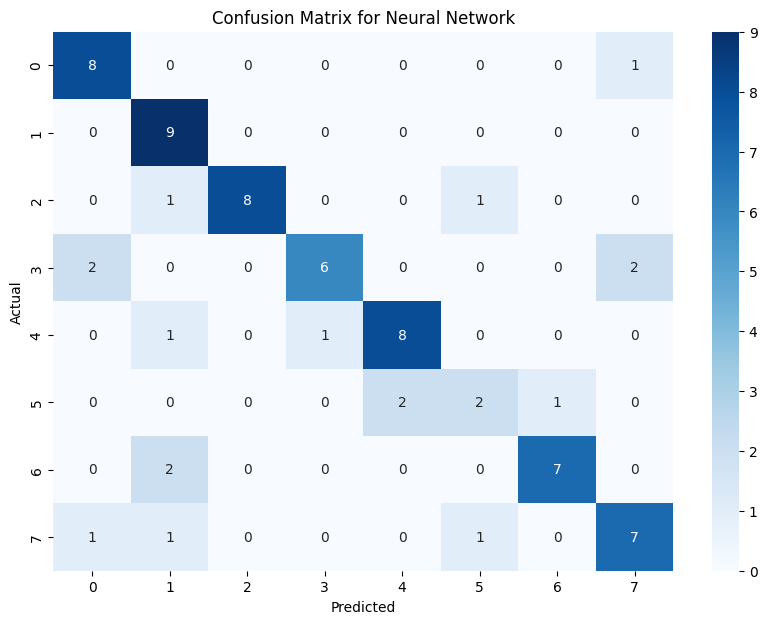

Neural Network ROC AUC: 0.9686187597598286
Neural Network F1 Score: 0.7614608001010388
Neural Network Accuracy: 0.7638888888888888


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize

# --- RandomForestClassifier Evaluation ---
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=300)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for RandomForestClassifier
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovr')
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f"RandomForestClassifier ROC AUC: {roc_auc_rf}")
print(f"RandomForestClassifier F1 Score: {f1_rf}")
print(f"RandomForestClassifier Accuracy: {accuracy_score(y_test, y_pred)}")
# --- Classification Report for RandomForestClassifier ---
report_rf = classification_report(y_test, y_pred)
print(f"Random Forest Classification Report:\n{report_rf}")
# --- Neural Network Evaluation ---
# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_categorical, epochs=50, batch_size=8, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Neural Network Accuracy: {accuracy}")

# Confusion matrix for Neural Network
y_pred_nn_probs = model.predict(X_test)  # Predict probabilities
y_pred_nn = np.argmax(y_pred_nn_probs, axis=1)  # Convert probabilities to class labels

cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for Neural Network
roc_auc_nn = roc_auc_score(y_test_categorical, y_pred_nn_probs, multi_class='ovr')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
print(f"Neural Network ROC AUC: {roc_auc_nn}")
print(f"Neural Network F1 Score: {f1_nn}")
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn)}")



In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train = np.array(X_train)
X_test = np.array(X_test)
# Reshape the input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train_categorical, epochs=50, batch_size=8, verbose=1, validation_data=(X_test_reshaped, y_test_categorical))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
print(f"CNN Model Accuracy: {accuracy}")

# Confusion matrix for CNN
y_pred_cnn_probs = model.predict(X_test_reshaped)  # Predict probabilities
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)  # Convert probabilities to class labels

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for CNN
roc_auc_cnn = roc_auc_score(y_test_categorical, y_pred_cnn_probs, multi_class='ovr')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
print(f"CNN ROC AUC: {roc_auc_cnn}")
print(f"CNN F1 Score: {f1_cnn}")

# Classification Report for CNN
report_cnn = classification_report(y_test, y_pred_cnn)
print(f"CNN Classification Report:\n{report_cnn}")


C:\Users\ADITYA UPADHYAY\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


KeyboardInterrupt: 